In [1]:
import matplotlib.pyplot as plt
import numpy as np
from electrolyzer import electrolyzer
from scipy.integrate import solve_ivp

### Additional parameters

In [2]:
C = 1e-3 # F/cm^2
stack = electrolyzer("templates/conditions_four_manifolds.json")

In [48]:
def current_drop(t, j):
    stp_val = 0 if t > 0.01 else 1
    y = stp_val * j
    return y

def shunt_model(t, eta0, j):
    j_load = current_drop(t, j)
    stack.Conditions.j_load = j_load # A/m^2
    stack.shunt_solve()
    j_stack = stack.stack_current_densiy()
    dy = 1/C * (j_stack - stack.Cell.current_density(eta0))
    plt.plot(j_stack)
    return dy    

### Steady state solution

In [49]:
stack.Conditions.j_load = 3000 # A/m^2
stack.coupled_solution("Colebrook")

get initial kinetic overpotentials

In [50]:
j = stack.stack_current_densiy()
V = stack.stack_voltage(j)
eta0 = V - stack.Cell.Erev - stack.Cell.Rc * j

### Dynamic solution

KeyboardInterrupt: 

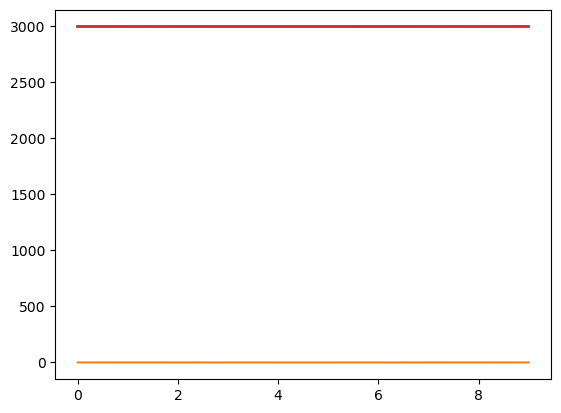

In [51]:
tspan = [0, 0.05]
y = solve_ivp(shunt_model, tspan, eta0, args=(3000,))